[8, 0]
[[100. 100. 100. 100. 100. 100. 100. 100.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]
[1, 2, 3, 4, 5]
[0.51020408 0.51020408 0.51020408 0.51020408 0.51020408]
[1. 1. 1. 1. 1.]
1
[ 0.         -0.51020408 -0.51020408 -0.51020408 -1.02040816]
[3.02040816 2.93422504 2.9316937  2.9316171  2.84282139]
[-0.51020408 -0.51020408 -0.51020408 -0.51020408  0.        ]
[ 0.          0.          0.          0.         51.02040816]


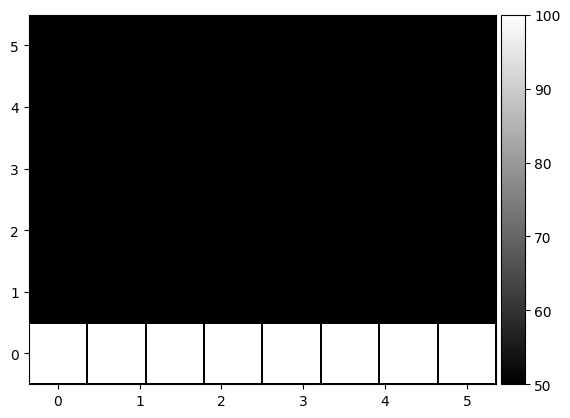

[[1.00000000e+02 1.00000000e+02 1.00000000e+02 1.00000000e+02
  1.00000000e+02 1.00000000e+02 1.00000000e+02 1.00000000e+02]
 [0.00000000e+00 1.79471029e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.12342467e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.43571116e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.45163367e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.59655974e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]


In [4]:
#%matplotlib notebook
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import numpy as np
from Domain import Mesh
from Domain import PDE_2D_Solver

def TDMA(W,C,E,Q):
        """
            W: west
            C: center
            E: east
            Q: source
        """
        n = len(Q)
        X = np.zeros(n)
        for i in range(1,n):
            C[i] = C[i] - E[i-1] * W[i] / C[i-1]
            Q[i] = Q[i] - Q[i-1] * W[i] / C[i-1]

        X[-1] = Q[-1] / C[-1]
        print(C)
        print(Q)
        # print("ssdgdsg")
        # print(list(range(n-1, -1, -1)))
        for i in range(n-2, -1, -1):
            X[i] = (Q[i] - E[i] * X[i+1]) / C[i]
        
        return X


x, y = sy.symbols('x y')

Ux = 1
qs = 1

N = 20
# Define the potensial function
phi = Ux*x + qs/(2*np.pi)*sy.log(x**2 + y**2)  #Potensial should be found by gridding. 

# Define the velocity components
u = sy.diff(phi, x)
v = sy.diff(phi, y)

u_fun = sy.lambdify([x,y], u)
v_fun = sy.lambdify([x,y], v)

# Mesh Properties 
x_list = np.linspace(-1, 1, N)
y_list = np.linspace(-1, 1, N)

X, Y = np.meshgrid(x_list, y_list)

u_num = u_fun(X,Y)
v_num = v_fun(X,Y)

z = X * np.exp(-X/2 - Y**2)
dx, dy = np.gradient(z)
n = -2
color = np.sqrt(((dx-n)/2)*2 + ((dy-n)/2)*2)

# print(phi)
# print(u)
# print(u_fun)
# print(u_fun(x_list,y_list))
# print(X)

# plt.figure(1)
# plt.quiver(X, Y, u_num, v_num, color)
# plt.streamplot(X, Y, u_num, v_num, density=[1, 0.4])
# plt.streamplot(X, Y, u_num, v_num, color=v_num, linewidth=2, cmap='autumn')
# plt.show()

# fig, mesh_ax = plt.subplots()

# plt.

# mesh_ax.pcolormesh(X,Y,np.zeros((N,N)),vmin=-0.5, vmax=1.0, edgecolors="black")

# plt.show()


block_coordinates = [(0,0),(0,5),(5,9),(9,0)]
print(list(block_coordinates[3]))
node_numbers = [8, 6]



space = Mesh(block_coordinates, node_numbers) #it seems like a one block. Build more sopisticated block type structures
# space.nonuniform_block_mesh_2D(-1.2, -1.4)
# space.nonuniform_mesh_2D(-1.2, -1.4)
space.uniform_block_mesh_2D()

# print(space.matricies[0])
# print(space.matricies[1])

BCs = {'W': 'D', 'S': 'N', 'E': 'N', 'N': 'D' }
BCs_values = {'W': 0, 'S': 0, 'E': 0, 'N': 100}

solution = PDE_2D_Solver(BCs)
solution.solver(BCs_values, space)


fig, ax = plt.subplots()
# # ax = fig1.add_subplot(111, projection='3d')
z = np.zeros((node_numbers[1],node_numbers[0]))
x_MAT = space.matricies[0]
y_MAT = space.matricies[1]
# # ax.plot_surface(x_MAT,y_MAT,z,vmin=-0.5, vmax=1.0, edgecolors="black")
# plt.plot(x_MAT,y_MAT,z,vmin=-0.5, vmax=1.0, edgecolors="black")
image = ax.pcolormesh(x_MAT,y_MAT,solution.solution, vmin=50, vmax=100, edgecolors="black", cmap='gray', linewidth=0.1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(image, cax=cax)
plt.show()

print(solution.solution)


# W = np.array([0, -4, -4],dtype='float')
# C = np.array([10, 10, 10],dtype='float')
# E = np.array([-4, -4, 0],dtype='float')
# Q = np.array([275, 75, 475],dtype='float')
 
# print(TDMA(W,C,E,Q))

# x_MAT = np.array([[1,2,3,4,5],[11,21,31,41,51],[51,52,53,54,55]])
# x_MAT = x_MAT.T
# print(x_MAT)
# print(x_MAT[-2:0:-1,1])
